# HSV変換を実装して，色相Hを反転せよ

## HSV変換とは  
Hue(色相)，Saturation(彩度)，Value(明度)で色を表現する手法

- Hue ... 色合いを0~360度で表現し，赤や青など色の種類を示す(　0 <= H < 360)
- Saturation ... 色の鮮やかさ．Saturationが低いと灰色さが顕著になり、くすんだ色になる( 0<= S < 1)
- Value ... 色の明るさ．Valueが高いほど白に近く，Valueが低いほど黒に近くなる．( 0 <= V < 1)


In [31]:
from pprint import pprint
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

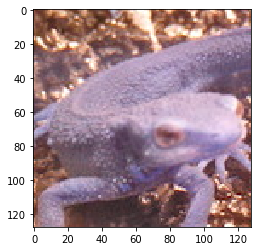

In [32]:
# 画像の読み込み
img = cv2.imread("data/imori.jpg")
# 画像の表示
plt.imshow(img)

array([[[114, 126, 132],
        [113, 159, 104],
        [112, 163, 100],
        ...,
        [120,  96, 175],
        [112, 122, 134],
        [108,  99, 163]],

       [[113, 126, 140],
        [114, 142, 117],
        [116, 142, 106],
        ...,
        [117,  61, 177],
        [112,  77, 176],
        [111, 102, 152]],

       [[113, 127, 137],
        [115, 127, 131],
        [116, 126, 119],
        ...,
        [116,  73, 207],
        [112,  80, 232],
        [112, 125, 161]],

       ...,

       [[112,  87, 231],
        [113, 122, 153],
        [115, 100, 160],
        ...,
        [113, 164, 107],
        [109, 159, 101],
        [108, 156,  93]],

       [[112,  79, 255],
        [113, 114, 172],
        [114,  97, 168],
        ...,
        [114, 156, 150],
        [111, 180, 119],
        [110, 180, 112]],

       [[111, 100, 214],
        [112, 106, 187],
        [114,  93, 176],
        ...,
        [112, 125, 185],
        [110, 135, 151],
        [108, 169, 116]]

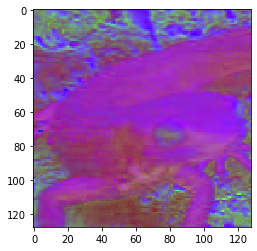

In [24]:
# OpenCVで実装
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 変換前
plt.imshow(img_hsv)
pprint(img_hsv)


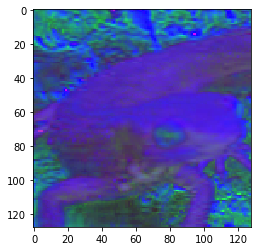

In [25]:
# Hueの反転(+180する)
img_hsv[..., 0] = (img_hsv[..., 0] + 180) % 360
img_hsv_t = img_hsv
plt.imshow(img_hsv_t)


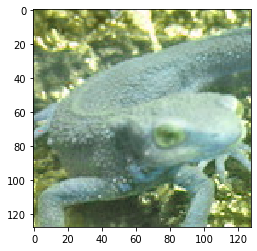

In [26]:
img_rgb = cv2.cvtColor(img_hsv_t, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb)

In [33]:
def rgb_to_hsv(src, ksize=3):
    # 高さ・幅・チャンネル数を取得
    h, w, c = src.shape
    
    # 入力画像と同じサイズで出力画像用の配列を生成(中身は空)
    dst = np.empty((h, w, c))

    for y in range(0, h):
        for x in range(0, w):
            # R, G, Bの値を取得して0～1の範囲内にする
            [b, g, r] = src[y][x]/255.0

            # R, G, Bの値から最大値と最小値を計算
            mx, mn = max(r, g, b), min(r, g, b)
        
            # 最大値 - 最小値
            diff = mx - mn

            # Hの値を計算
            if mx == mn : h = 0
            elif mx == r : h = 60 * ((g-b)/diff)     
            elif mx == g : h = 60 * ((b-r)/diff) + 120  
            elif mx == b : h = 60 * ((r-g)/diff) + 240
            if h < 0 : h = h + 360
                
            # Sの値を計算
            if mx != 0:s = diff/mx       
            else: s = 0
            
            # Vの値を計算
            v = mx
            
            # Hを0～179, SとVを0～255の範囲の値に変換
            dst[y][x] = [h * 0.5, s * 255, v * 255]

    return dst

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


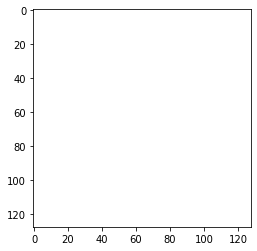

In [34]:
hsv = rgb_to_hsv(img)
plt.imshow(hsv)